# 💳 Project #1 - Exploratory Data Analysis on Credit Card Fraud Data
*by Andrew Kim - kim.andrew.j1@gmail.com*

## 🎯 Objective
Perform exploratory data analysis (EDA) using a real-world fraud dataset to uncover insights, spot anomalies, and build intuition about fraud patterns. 

Your goal is to develop a clear understanding of the dataset’s structure, key variables, and any potential signs of fraud using summary statistics and data visualizations.

---

## 🗂️ The Dataset (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
The Dataset is comprised of:
- Transactions made by European cardholders in September 2013
- Features are PCA-transformed (`V1`–`V28`) plus `Time`, `Amount`, and `Class`
- `Class = 1` indicates a Fraudulent transaction

---

## ✅ Project Tasks
1. **Import the Dataset**
  - Load the dataset into a Pandas DataFrame
  - Use `df.head()` to preview the first few rows

2. **Summary Statistics**
  - Use `df.describe()` to examine key metrics
  - Highlight and interpret any differences between Fraudulent and Non-Fraudulent transactions

3. **Boxplot**
  - Plot a boxplot comparing the `Amount` variable by `Class` (fraud vs. non-fraud)
  - Identify any outliers or unusual distributions

4. **Histogram**
  - Create a histogram of transaction amounts
  - Use color or grouping to compare fraud vs. non-fraud

5. **Correlation Heatmap**
  - Generate a correlation matrix of all numeric features
  - Plot it using `seaborn.heatmap()` and interpret any strong relationships

6. **Observations**
  - Provide a short Markdown summary of what you've discovered

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print("Pandas Version:", pd.__version__)
print("Seaborn Version:", sns.__version__)
print("NumPy Version:", np.__version__)
print("MatPlot Version:", matplotlib.__version__)

Pandas Version: 2.2.2
Seaborn Version: 0.13.2
NumPy Version: 1.26.4
MatPlot Version: 3.9.2


# Dataset Loading Instructions (FIX)
This notebook will automatically search for `creditcard.csv` in multiple locations:
   - Same directory as notebook (recommended)
   - Downloads folder
   - Manual upload prompt (if using Google Colab)

Dataset source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
# =====================================
# DATASET LOADING
# =====================================

import pandas as pd 
import os

# (FIX)
# Try multiple loading methods
try:
    # Try 1: Current Notebook directory
    df = pd.read_csv('creditcard.csv')
    print("Loaded from current directory")
except:
    try:
        # Try 2: Downloads Folder (for local)
        df = pd.read_csv(os.path.expanduser('~/Downloads/creditcard.csv'))
        print("Loaded from Downloads Folder")
    except:
        try:
            # Try 3: Upload (for Google Colab)
            from google.colab import files
            print("Please upload creditcard.csv")
            uploaded = files.upload()
            df = pd.read_csv('creditcard.csv')
            print("File uploaded successfully")
        except:
            print("ERROR: Could not find creditcard.csv")
            print("Place creditcard.csv in the same folder as this notebook")
            print("Download from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")
            raise

print(df.head())

Loaded from current directory
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

  

# **Observations - Dataset (creditcard.csv)**
- This dataset represents credit card transactions made by European Credit Card users in Sept 2013 over 48 hours
  - **`Time`** represents seconds elapsed between first recorded transaction and each subsequent transaction after
  - **`Amount`** represents the transaction amount
  - **`Class`** is the response variable where **`1` = Fraudulent** and **`0` = Legitimate**
  - **`V1`, `V2`, `V3`, ... `V28`** are protected transaction details that have been mathematically disguised for privacy

In [3]:
# =====================================
# STATISTICS SUMMARY
# =====================================

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **Observations**
This is a summary of statistical information from the DataFrame "df"
- **`count`**: There were **284,807** values under **`Time`**, meaning that there were **284,807** total transactions over **2 Days/48 Hours**
- **`mean`**: The average transaction occurred around **`94,813` seconds** - approx. 1.1 Days - from the first transaction; Average Transaction was **`$88.35`** 
- **`std`**: The standard deviation of **`$250.12`** indicates transactions were spread throughout the time period (not clustered) and had highly variable amounts (from small to very large)
- **`min`**: The earliest transaction occurred at 0 seconds - start of recording; Smallest Transaction was **`$0`**
- **`max`**: The latest transaction occurred at **`172,792`** seconds - approx. 2 Days - from the first transaction; Largest Transaction was **`$25,691.16`** 

In [4]:
df[df["Class"] == 1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [5]:
df[df["Class"] == 0].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


# **Observations**
- There were **`492` transactions** that have been flagged as **Fraudulent**
- **`mean`**: Average fraudulent transaction amount was **`$122.21`**
- **`std`**: Average spread of fraudulent transactions from average fraudulent transaction amount was slightly higher compared to entire dataset
  - Compare **`$256.68`** v. **`$250.12`**
- **`min`**: Earliest transactions flagged as Fraudulent occurred **`406` seconds** (**`~6.77` min**) after the first recorded transaction; Amount was **`$0`**
- **`max`**: The largest fraudulent transaction was **`$2,125.87`** which occurred **`170,348`** seconds (**`~1.97` Days**) after the first record transaction

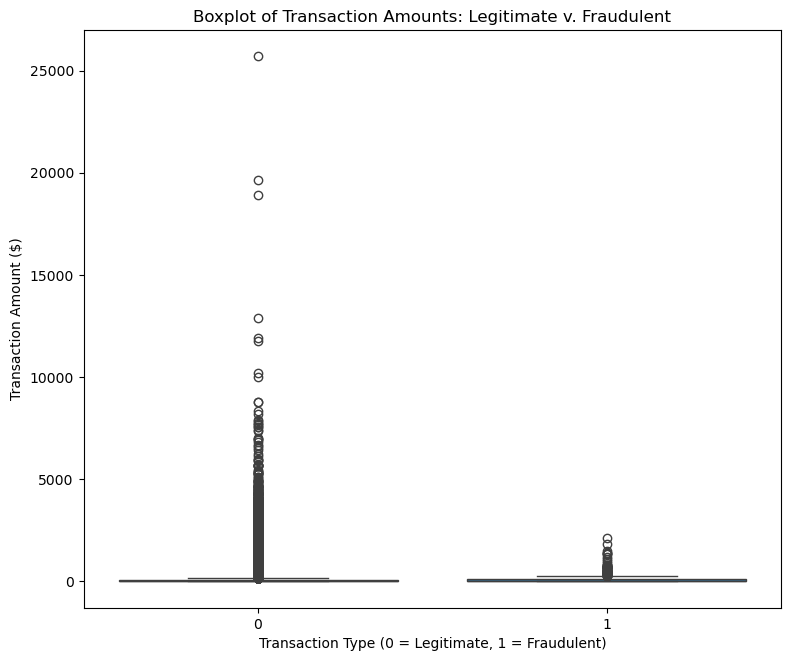

In [6]:
# =====================================
# BOXPLOT VISUALIZATION
# =====================================

plt.figure(figsize=(9,7.5))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Boxplot of Transaction Amounts: Legitimate v. Fraudulent")
plt.xlabel("Transaction Type (0 = Legitimate, 1 = Fraudulent)")
plt.ylabel("Transaction Amount ($)")
plt.show()

# **Observations**
- **Fraudulent transactions** tend to be lower in amount; concentrated to amounts **`< $2,500`**
- **Legitimate transactions** exhibit multiple outliers - particularly when amounts were **`> $10,000`** 
- **BOTH types of transactions** are greatly concentrated in amounts **`< $5,000`**

Histogram of Transaction Amounts
Basic information about transaction amounts:
Total number of transactions: 284807
Average transaction amount: $88.35
Lowest transaction amount: $0.00
Highest transaction amount: $25691.16


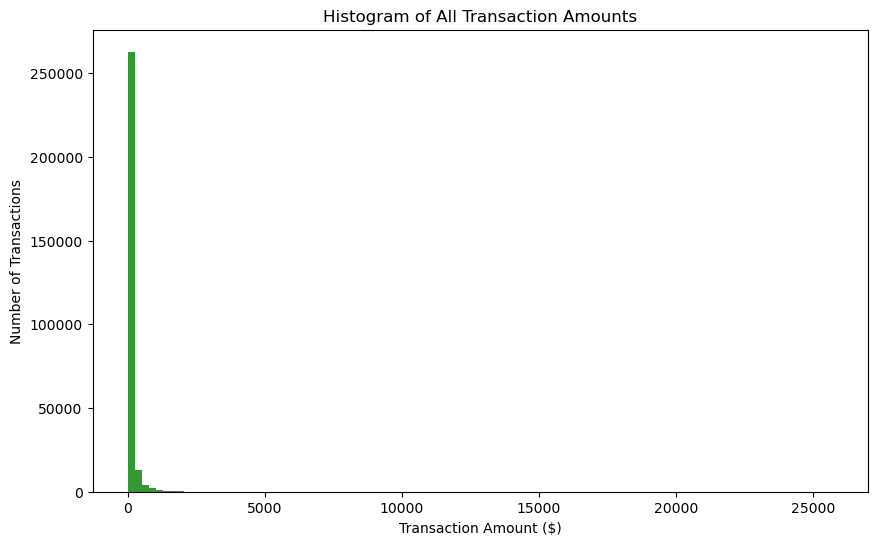


Legitimate transactions: 284315
Fraudulent transactions: 492


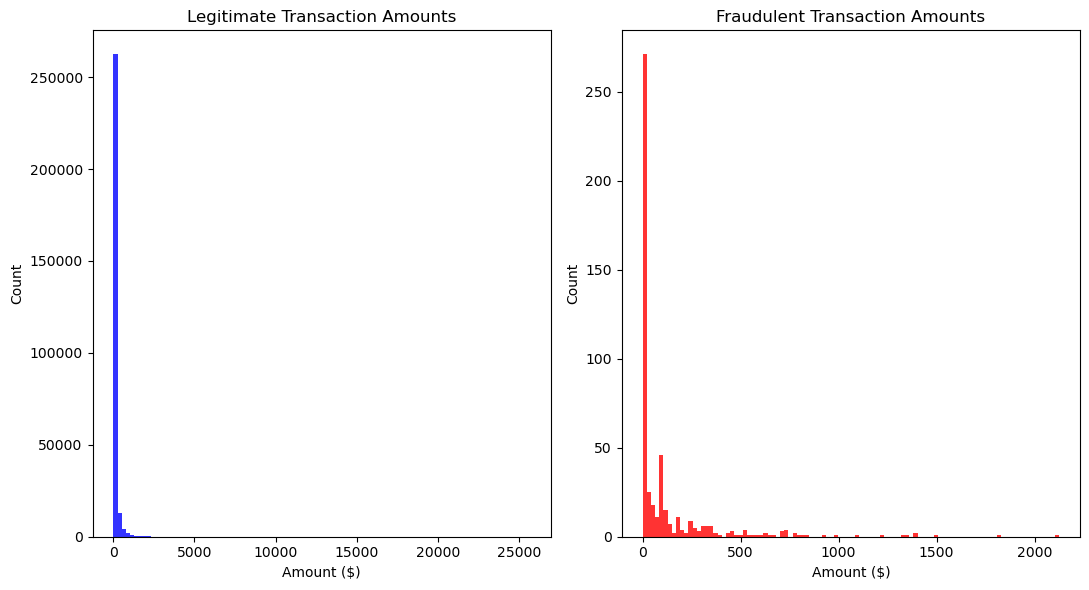


Average Legitimate transaction: $88.29
Average Fraudulent transaction: $122.21


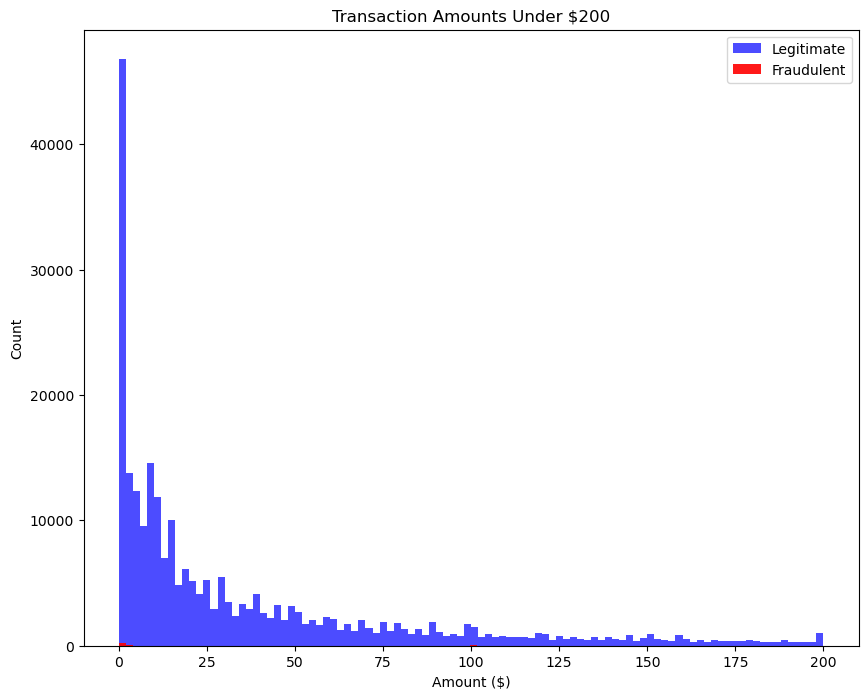


Transactions under $200:
Legitimate: 255563 transactions
Fraudulent: 407 transactions


In [7]:
# =====================================
# HISTOGRAM VISUALIZATIONS
# =====================================

print("Histogram of Transaction Amounts")
print("Basic information about transaction amounts:")

print(f"Total number of transactions: {len(df)}")
print(f"Average transaction amount: ${df['Amount'].mean():.2f}")
print(f"Lowest transaction amount: ${df['Amount'].min():.2f}")
print(f"Highest transaction amount: ${df['Amount'].max():.2f}")

plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=100, color='green', alpha=0.8)
plt.title('Histogram of All Transaction Amounts')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Number of Transactions')
plt.show()

fraud_data = df[df['Class'] == 1]  # Fraudulent transactions
legit_data = df[df['Class'] == 0]  # Legitimate transactions

print(f"\nLegitimate transactions: {len(legit_data)}")
print(f"Fraudulent transactions: {len(fraud_data)}")

plt.figure(figsize=(11, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(legit_data['Amount'], bins=100, color='blue', alpha=0.8)
plt.title('Legitimate Transaction Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(fraud_data['Amount'], bins=100, color='red', alpha=0.8)
plt.title('Fraudulent Transaction Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print(f"\nAverage Legitimate transaction: ${legit_data['Amount'].mean():.2f}")
print(f"Average Fraudulent transaction: ${fraud_data['Amount'].mean():.2f}")

small_legit = legit_data[legit_data['Amount'] <= 200]
small_fraud = fraud_data[fraud_data['Amount'] <= 200]

plt.figure(figsize=(10, 8))
plt.hist(small_legit['Amount'], bins=100, alpha=0.7, label='Legitimate', color='blue')
plt.hist(small_fraud['Amount'], bins=100, alpha=0.9, label='Fraudulent', color='red')
plt.title('Transaction Amounts Under $200')
plt.xlabel('Amount ($)')
plt.ylabel('Count')
plt.legend()  # Shows the colored labels
plt.show()

print(f"\nTransactions under $200:")
print(f"Legitimate: {len(small_legit)} transactions")
print(f"Fraudulent: {len(small_fraud)} transactions")

Correlation Heatmap Analysis
Number of features: 31


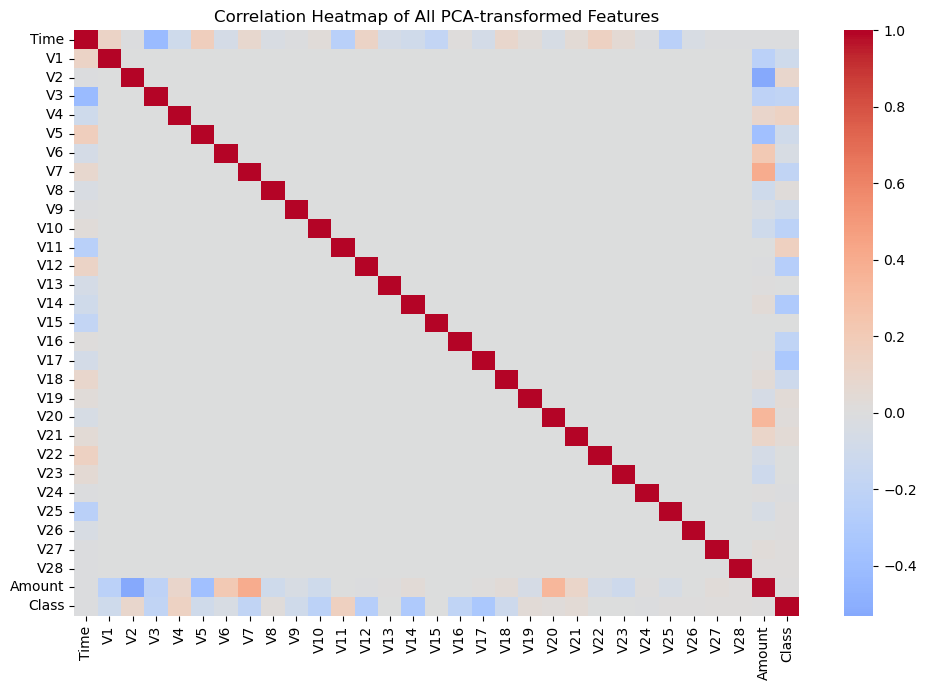

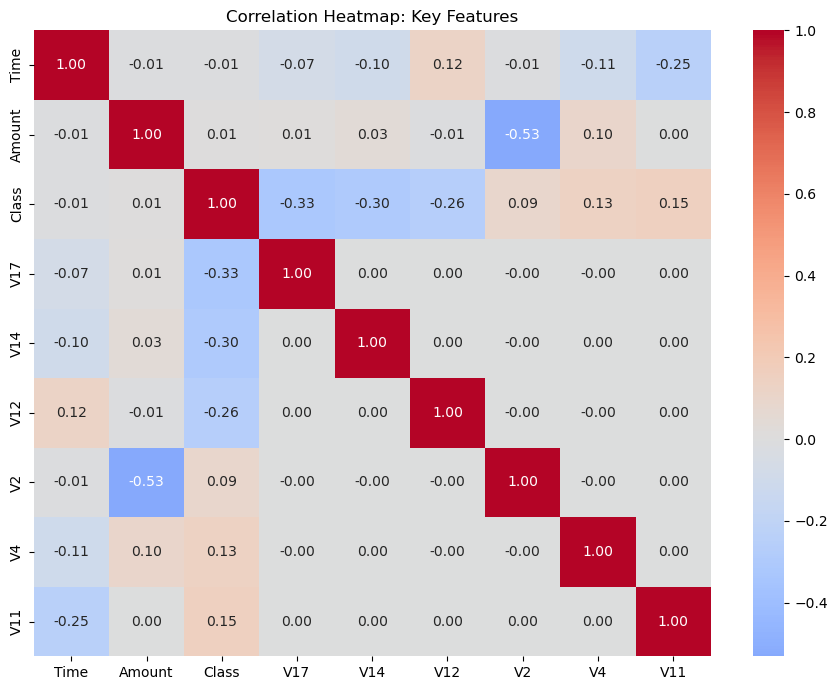

All PCA-transformed Feature Correlations with Fraud:
V17: -0.326
V14: -0.303
V12: -0.261
V10: -0.217
V16: -0.197
V3: -0.193
V7: -0.187
V18: -0.111
V1: -0.101
V9: -0.098
V5: -0.095
V6: -0.044
Time: -0.012
V24: -0.007
V13: -0.005
V15: -0.004
V23: -0.003
V22: 0.001
V25: 0.003
V26: 0.004
Amount: 0.006
V28: 0.010
V27: 0.018
V8: 0.020
V20: 0.020
V19: 0.035
V21: 0.040
V2: 0.091
V4: 0.133
V11: 0.155

Which PCA-transformed Features relate to Fraud?

Most related to fraudulent transactions:
V19: 0.03
V21: 0.04
V2: 0.09
V4: 0.13
V11: 0.15

Most related to legitimate transactions:
V17: -0.33
V14: -0.30
V12: -0.26
V10: -0.22
V16: -0.20
V3: -0.19

Amount v. Fraud: 0.01
Time v. Fraud: -0.01


In [8]:
# =====================================
# HEATMAP VISUALIZATION
# =====================================

print("Correlation Heatmap Analysis")
correlation_matrix = df.corr()
print(f"Number of features: {len(correlation_matrix.columns)}")

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',     # Blue and Red colors
            center=0)            # Center colors at 0

plt.title('Correlation Heatmap of All PCA-transformed Features')
plt.tight_layout()
plt.show()

key_features = ['Time', 'Amount', 'Class', 'V17', 'V14', 'V12', 'V2', 'V4', 'V11']

plt.figure(figsize=(9, 7))
small_corr = correlation_matrix.loc[key_features, key_features]

sns.heatmap(small_corr,
            annot=True,          # Show the correlation numbers
            cmap='coolwarm',
            center=0,
            fmt='.2f')           # Show 2 decimal places

plt.title('Correlation Heatmap: Key Features')
plt.tight_layout()
plt.show()

class_correlations = correlation_matrix['Class'].sort_values()

print("All PCA-transformed Feature Correlations with Fraud:")

for feature, corr in class_correlations.items():
    if feature != 'Class':  # Skip Class itself
        print(f"{feature}: {corr:.3f}")

print(f"\nWhich PCA-transformed Features relate to Fraud?")

class_correlations = correlation_matrix['Class'].sort_values()

print(f"\nMost related to fraudulent transactions:")
fraud_features = class_correlations.tail(6)
for feature, corr in fraud_features.items():
    if feature != 'Class':  # Skip Class itself (always 1.0)
        print(f"{feature}: {corr:.2f}")

print(f"\nMost related to legitimate transactions:")
legit_features = class_correlations.head(6)
for feature, corr in legit_features.items():
    print(f"{feature}: {corr:.2f}")

amount_corr = correlation_matrix.loc['Amount', 'Class']
time_corr = correlation_matrix.loc['Time', 'Class']
print(f"\nAmount v. Fraud: {amount_corr:.2f}")
print(f"Time v. Fraud: {time_corr:.2f}")

# **Observations**
- PCA-transformed Features **`V11`**, **`V4`**, **`V2`** are **most** correlated to fraudulent transactions
- PCA-transformed Features **`V17`**, **`V14`**, **`V12`** are **least** correlated to fraudulent transactions
- **`Time`** and **`Amount`** are **weakly** correlated to Fraudulent transactions - being close to **`0`**

---
# **Additional Analysis**
---

📈 **Task 1:** Plotting **Fraud Rate Over Time** using **`Time`** column        
🧮 **Task 2:** Using **`groupby()`** to explore **Fraud by Amount Bins**      
🧾 **Task 3:** Using **`z-score`** for **Outlier Detection**     

TASK 1: Plotting Fraud Rate over Time



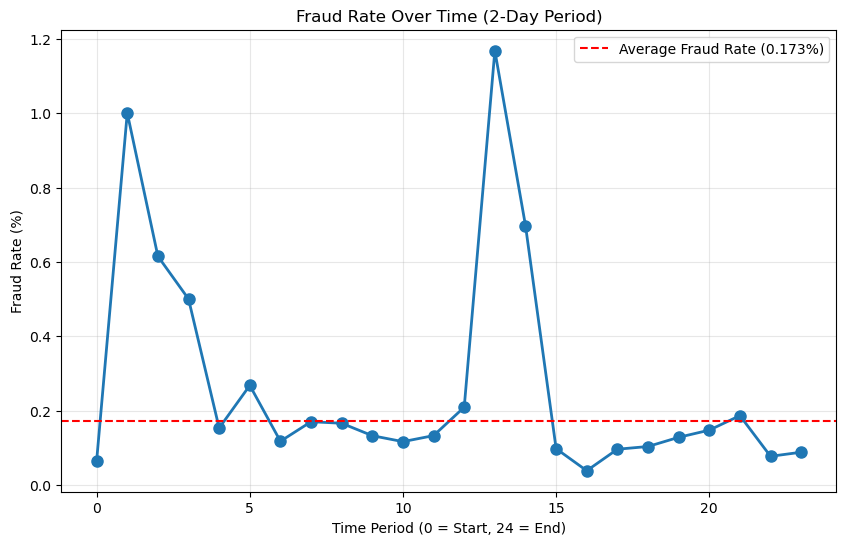

Average Fraud Rate across all time periods: 0.270%
Highest Fraud Rate period: Period 13 with 1.168%
Lowest Fraud Rate period: Period 16 with 0.038%


In [9]:
# =====================================
# TASK 1: FRAUD RATE OVER TIME
# =====================================

print("TASK 1: Plotting Fraud Rate over Time\n")

# Create time periods (divide the 2 days into 24 periods - 2 hours)
df['TimePeriod'] = pd.cut(df['Time'], bins=24, labels=False)

# Calculate fraud rate for each time period
time_fraud = df.groupby('TimePeriod')['Class'].agg(['count', 'sum'])
time_fraud['fraud_rate'] = (time_fraud['sum'] / time_fraud['count']) * 100

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(time_fraud.index, time_fraud['fraud_rate'], marker='o', linewidth=2, markersize=8)
plt.title('Fraud Rate Over Time (2-Day Period)')
plt.xlabel('Time Period (0 = Start, 24 = End)')
plt.ylabel('Fraud Rate (%)')
plt.grid(True, alpha=0.3)

# Add average fraud rate line
avg_fraud_rate = (df['Class'].sum() / len(df)) * 100
plt.axhline(y=avg_fraud_rate, color='r', linestyle='--', label=f'Average Fraud Rate ({avg_fraud_rate:.3f}%)')
plt.legend()
plt.show()

# Print summary statistics
print(f"Average Fraud Rate across all time periods: {time_fraud['fraud_rate'].mean():.3f}%")
print(f"Highest Fraud Rate period: Period {time_fraud['fraud_rate'].idxmax()} with {time_fraud['fraud_rate'].max():.3f}%")
print(f"Lowest Fraud Rate period: Period {time_fraud['fraud_rate'].idxmin()} with {time_fraud['fraud_rate'].min():.3f}%")

# **Observations**
- Average Fraud Rate within 2 Days = **`.17%`**
- Average Fraud Rate across all 2 Hour Periods within 2 Days = **`.27%`**
- Highest Fraud Rate occurred within **`24-26 hours`** (Time Period 13)
- Lowest Fraud Rate occurred within **`30-32 hours`** (Time Period 16)

TASK 2: Exploring Fraud by Amount bins

Fraud Analysis by Amount Range:
             Total_Transactions  Fraud_Count  Fraud_Rate  Fraud_Rate_Percent
AmountRange                                                                 
$0-50                    189220          279    0.001474            0.147447
$50-100                   37254           56    0.001503            0.150319
$100-200                  27671           45    0.001626            0.162625
$200-500                  19695           50    0.002539            0.253872
$500-1000                  6202           26    0.004192            0.419220
$1000+                     2656            9    0.003389            0.338855




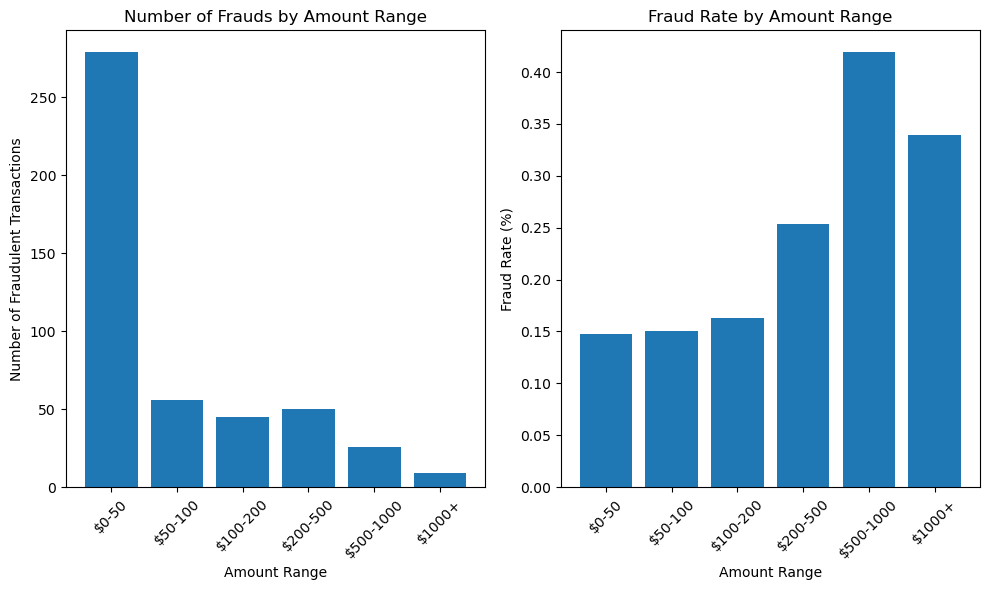

In [10]:
# =====================================
# TASK 2: groupby() FRAUD BY AMOUNT
# ===================================== 

print("TASK 2: Exploring Fraud by Amount bins\n")

# Create amount bins (ranges)
bins = [0, 50, 100, 200, 500, 1000, 3000]
labels = ['$0-50', '$50-100', '$100-200', '$200-500', '$500-1000', '$1000+']
df['AmountRange'] = pd.cut(df['Amount'], bins=bins, labels=labels)

# Group by amount range and calculate fraud statistics
fraud_by_amount = df.groupby('AmountRange', observed=False)['Class'].agg(['count', 'sum', 'mean'])
fraud_by_amount.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate']
fraud_by_amount['Fraud_Rate_Percent'] = fraud_by_amount['Fraud_Rate'] * 100

# Display the results
print("Fraud Analysis by Amount Range:")
print(fraud_by_amount)
print("\n")

# Create a simple bar chart
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(fraud_by_amount.index, fraud_by_amount['Fraud_Count'])
plt.title('Number of Frauds by Amount Range')
plt.xlabel('Amount Range')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(fraud_by_amount.index, fraud_by_amount['Fraud_Rate_Percent'])
plt.title('Fraud Rate by Amount Range')
plt.xlabel('Amount Range')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **Observations**
- Highest occurrence of Fraudulent Transactions was within **`$0–50`** range  
    - **Insight:** Likely Test Transactions
- Lowest occurrence of Fraudulent Transactions was above **`$10,000`** range
- Highest Fraud Rates were within **`$500–1,000`**, **`$200–500`**, and **`$10,000+`** ranges respectively
    - **Insight:** Likely fraudulent purchases for luxury items, tech & toys — purchases easily refundable without raising detection

TASK 3: Z-score Outlier Detection

Mean transaction amount: $88.35
Standard deviation: $250.12

Outlier threshold: z-score > 3 or < -3
Number of outliers detected: 4076 out of 284807 transactions (1.43%)

Fraud rate in outliers: 0.27%
Fraud rate in all data: 0.17%


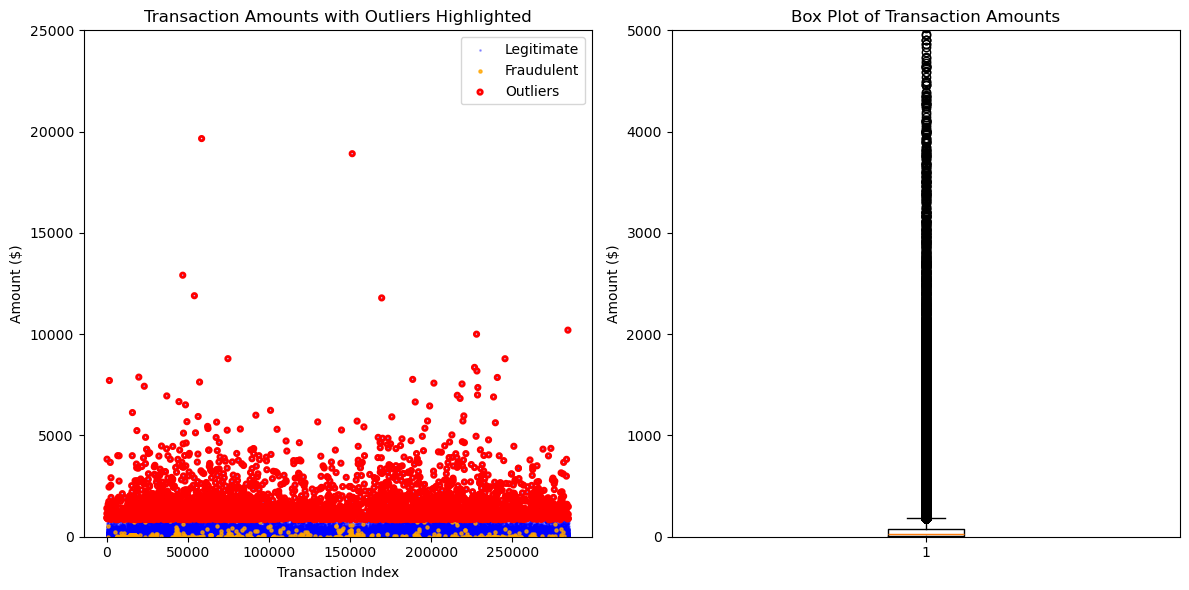


Example outlier transactions:
      Time   Amount  Class    z_score
51    36.0  1402.95      0   5.255876
89    59.0  1142.02      0   4.212658
140   87.0   919.60      0   3.323405
150   93.0   937.69      0   3.395730
164  103.0  3828.04      0  14.951578
174  112.0   937.69      0   3.395730
513  379.0   881.13      0   3.169599
633  481.0  1015.61      0   3.707260
736  553.0   986.31      0   3.590117
865  656.0  1602.99      0   6.055652


In [11]:
# =====================================
# TASK 3: Z-SCORE
# =====================================

print("TASK 3: Z-score Outlier Detection\n")

# Calculate z-scores for the Amount column
# Z-score = (value - mean) / standard deviation
mean_amount = df['Amount'].mean()
std_amount = df['Amount'].std()
df['z_score'] = (df['Amount'] - mean_amount) / std_amount

# Find outliers (typically z-score > 3 or < -3)
threshold = 3
outliers = df[abs(df['z_score']) > threshold]

print(f"Mean transaction amount: ${mean_amount:.2f}")
print(f"Standard deviation: ${std_amount:.2f}")
print(f"\nOutlier threshold: z-score > {threshold} or < -{threshold}")
print(f"Number of outliers detected: {len(outliers)} out of {len(df)} transactions ({len(outliers)/len(df)*100:.2f}%)")

# Check if outliers are more likely to be fraud
outlier_fraud_rate = (outliers['Class'].sum() / len(outliers)) * 100
normal_fraud_rate = (df['Class'].sum() / len(df)) * 100

print(f"\nFraud rate in outliers: {outlier_fraud_rate:.2f}%")
print(f"Fraud rate in all data: {normal_fraud_rate:.2f}%")

# Visualize outliers
plt.figure(figsize=(12, 6))

# Scatter plot showing outliers
plt.subplot(1, 2, 1)
legitimate = df[df['Class'] == 0]
fraudulent = df[df['Class'] == 1]
plt.scatter(legitimate.index, legitimate['Amount'], alpha=0.3, s=1, label='Legitimate', color='blue')
plt.scatter(fraudulent.index, fraudulent['Amount'], alpha=0.8, s=5, label='Fraudulent', color='orange')
plt.scatter(outliers.index, outliers['Amount'], color='red', s=10,
            facecolors='none', edgecolors='red', linewidth=2, label='Outliers')
plt.title('Transaction Amounts with Outliers Highlighted')
plt.xlabel('Transaction Index')
plt.ylabel('Amount ($)')
plt.legend()
plt.ylim(0, 25000)

# Box plot to visualize outliers
plt.subplot(1, 2, 2)
plt.boxplot(df['Amount'])
plt.title('Box Plot of Transaction Amounts')
plt.ylabel('Amount ($)')
plt.ylim(0, 5000)

plt.tight_layout()
plt.show()

# Show some example outliers
print("\nExample outlier transactions:")
print(outliers[['Time', 'Amount', 'Class', 'z_score']].head(10))

# Clean up - remove temporary columns
df.drop(['z_score'], axis=1, inplace=True)

# **Observations**
- Fraudulent transactions were concentrated in lower range of transaction amounts **`< $1,000`**
- Outliers were **NOT** indicative of fraudulent transactions
    - **Insight:** Extreme Outliers were ALL legitimate transactions - per z_score chart
    - **Insight:** Transaction Amounts - especially high amounts - not a strong indicator of fraud

# **Final Observations Summary**

**Dataset Overview**
- **`284,807`** transactions over **`2`** days (Sept 2013)
- **`492`** fraudulent transactions (**`0.17%`** Fraud Rate)
- Average transaction: **`$88.35`**

**Suspicious Trends Discovered**
- Fraudulent transactions average **`$122.21`** but stay below **`$2,500`**
- Legitimate transactions have *outliers* up to **`$25,691`**
- **Insight:** Large amounts (above **`$2,500`**) increase detection risk

**Timing**
- First fraud occurred **within 7 minutes** of recording
- Fraud distributed throughout 2-day period
- Time has **weak correlation** with fraud

**High-Correlation Variables**
- Top 3 Features Most Predictive of Fraud:
  - **`V11`** (highest correlation)
  - **`V4`** (second highest)
  - **`V2`** (third highest)
- Weak Predictors: **`V17`**, **`V14`**, **`V12`**, **`Time`**, and **`Amount`**

**Visual Insights**
- **Boxplot** revealed fraud was concentrated in lower amounts
- **Histogram** showed most transactions (both legitimate and fraudulent) were under **`$5,000`**
- **Heatmap** confirmed **`V11`**, **`V4`**, **`V2`** as KEY fraud indicators

**Quick Stats**
- **Fraud Rate** = **`0.17`**  (492 out of 284,807 transactions)
- **Max fraudulent amount** = **`$2,125.87`**  
  - Compare to max legitimate amount of **`$25,691.16`**
- **Target fraudulent amount** = **`< $2,500`**
  - Where most fraud occurred
    - **Insight:** Fraud occurs within range of legitimate transactions to limit detection
    - **Insight:** Smaller transactions avoid detection compared to Larger transactions

**Recommendations**
- Focus fraud detection models on **`V11`**, **`V4`**, **`V2`** features (per Heatmap Analysis)
- Flag mid-range transactions (**`$100-$2,500`**) for review (per Histograms)
- Large transactions (**`>$10,000`**) were rarely fraudulent (per Boxplot and Histograms)